In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

plt.rcParams['figure.dpi']=300
plt.rcParams['savefig.dpi']=300
plt.rcParams['figure.figsize']=(8.0, 4.0)

In [2]:
path = r'./data/movie_metadata.csv'
df = pd.read_csv(path)
print('{:*^60}'.format('数据类型：'))
print(pd.DataFrame(df.dtypes))
df

***************************数据类型：****************************
                                 0
color                       object
director_name               object
num_critic_for_reviews     float64
duration                   float64
director_facebook_likes    float64
actor_3_facebook_likes     float64
actor_2_name                object
actor_1_facebook_likes     float64
gross                      float64
genres                      object
actor_1_name                object
movie_title                 object
num_voted_users              int64
cast_total_facebook_likes    int64
actor_3_name                object
facenumber_in_poster       float64
plot_keywords               object
movie_imdb_link             object
num_user_for_reviews       float64
language                    object
country                     object
content_rating              object
budget                     float64
title_year                 float64
actor_2_facebook_likes     float64
imdb_score                 fl

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


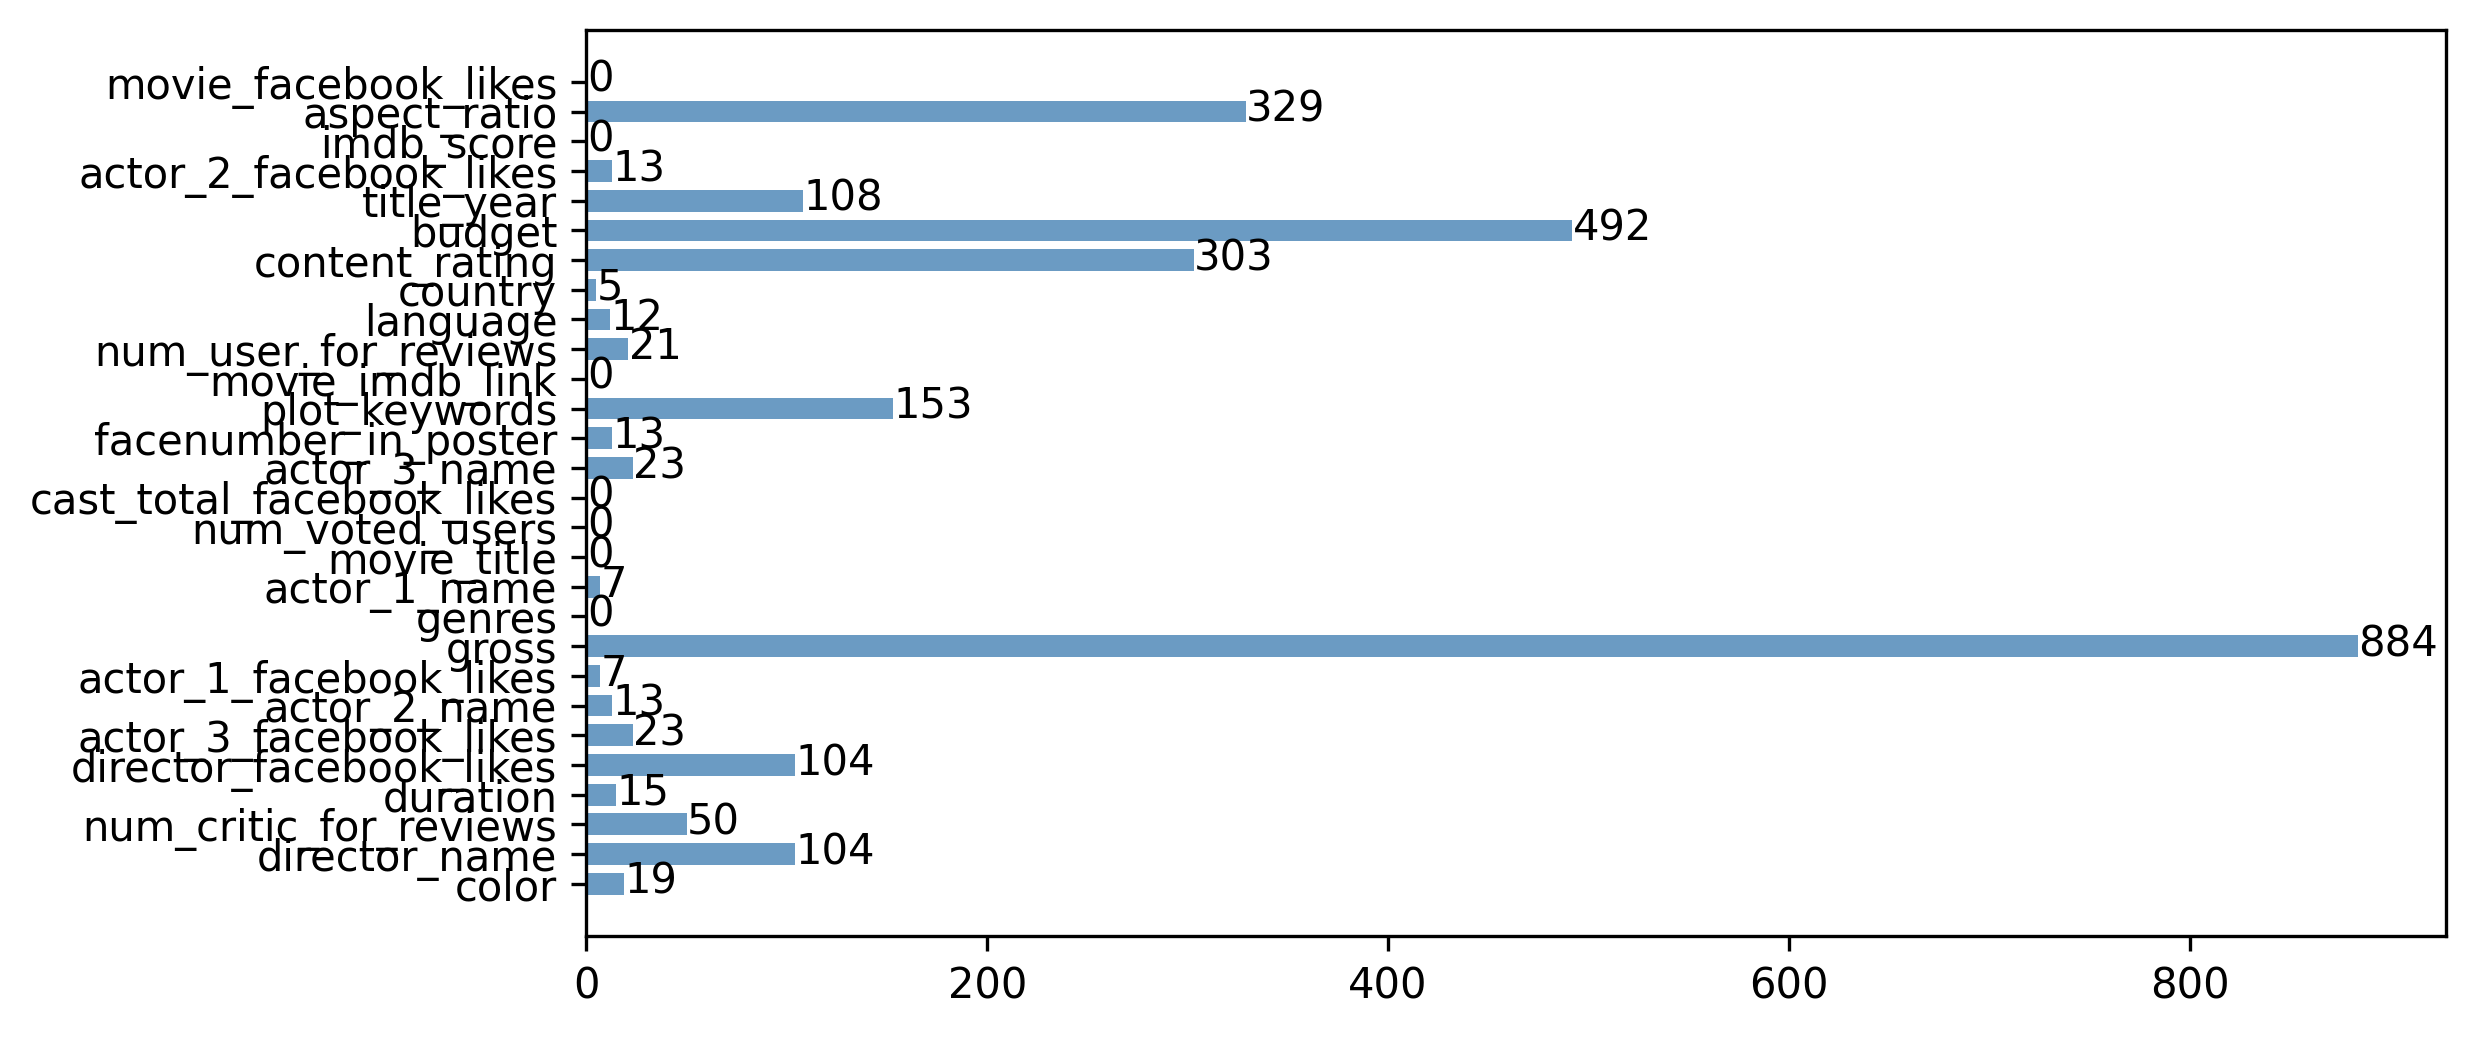

In [3]:
### 查看空缺值的分布情况
col_name = df.columns.values
col_null_num = [df[name].isnull().sum() for name in col_name]
x = range(len(col_name))
plt.barh(range(0, len(col_name)*3, 3), col_null_num, height=2.2, color='steelblue', alpha=0.8)
plt.yticks(range(0, len(col_name)*3, 3), col_name)
for x,y in enumerate(col_null_num):
    plt.text(y+0.2, x*3-1.0, '%s' % y)
# plt.bar(left=x, height=col_null_num, width=0.4, alpha=0.8, color='red', label="null")
# plt.xticks([index +0.2 for index in x], columna_name)
plt.show()
# plt.savefig("null.png")

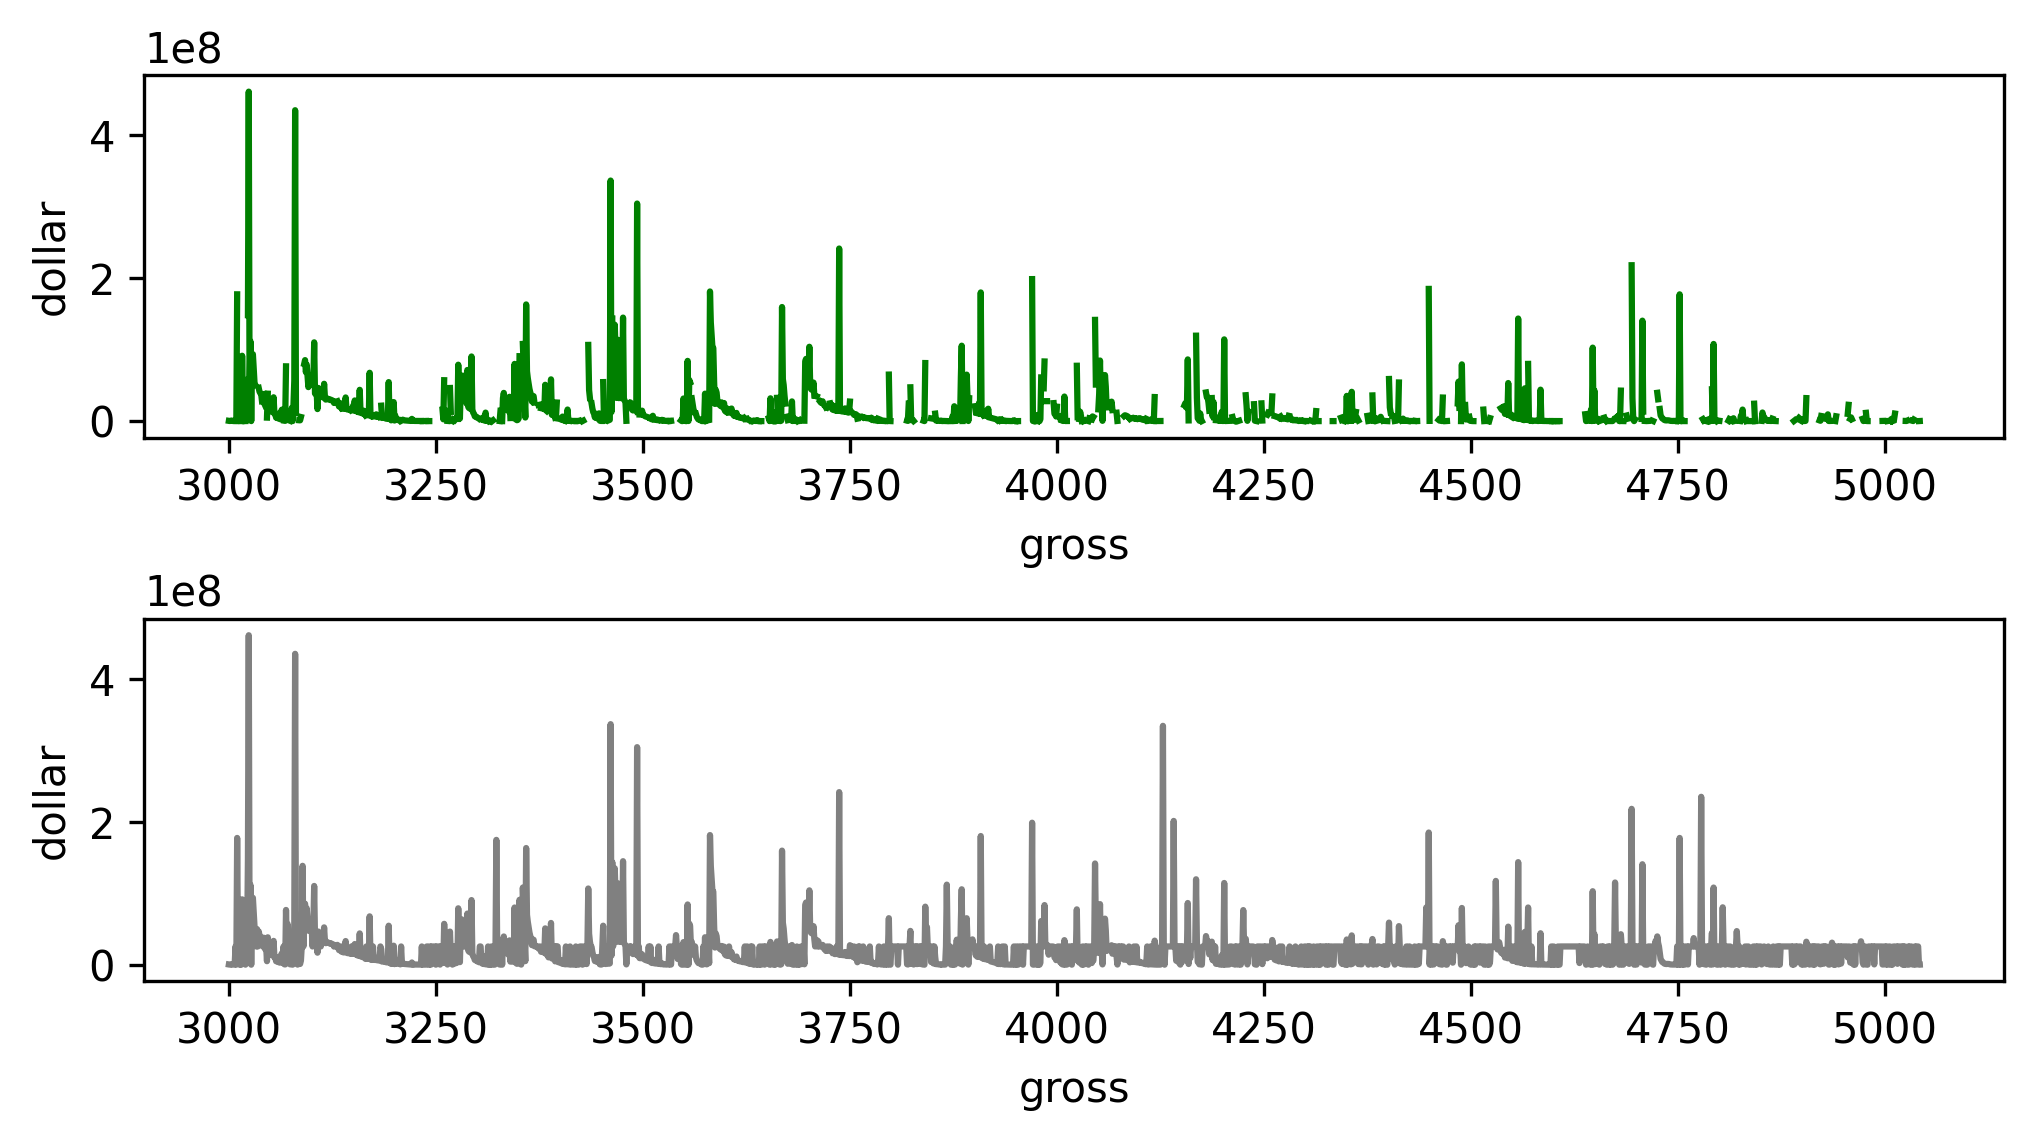

In [6]:
##空缺值处理
df_gross = df['gross']
##众值填充
df_gross_fill = df_gross.fillna(df.gross.median())
##中值填充
# df_gross_fill = df_gross.fillna(df.gross.mean())
##插值法
# df_gross_fill = df_gross.fillna(method='pad')


plt.subplot(2, 1, 1)
plt.subplots_adjust(wspace=0,hspace=0.5)
# plt.tight_layout()
plt.xlabel("gross")
plt.ylabel("dollar")
plt.plot(df_gross[3000:], color='green') ##调整上下间距
plt.subplot(2, 1, 2)
plt.xlabel("gross")
plt.ylabel("dollar")
plt.plot(df_gross_fill[3000:], color='gray')
plt.show()

In [65]:
##数据统计值 数值型才有
df.describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,140.19,1.216000e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,107.20,2.520000e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,686.51,2.813330e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,645.01,1.665040e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6560.05,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,48468407.53,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,83668.16,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9699.06,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.37,2.010000e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,272.77,3.779800e+02,1.00,65.00,156.00,326.00,5.060000e+03


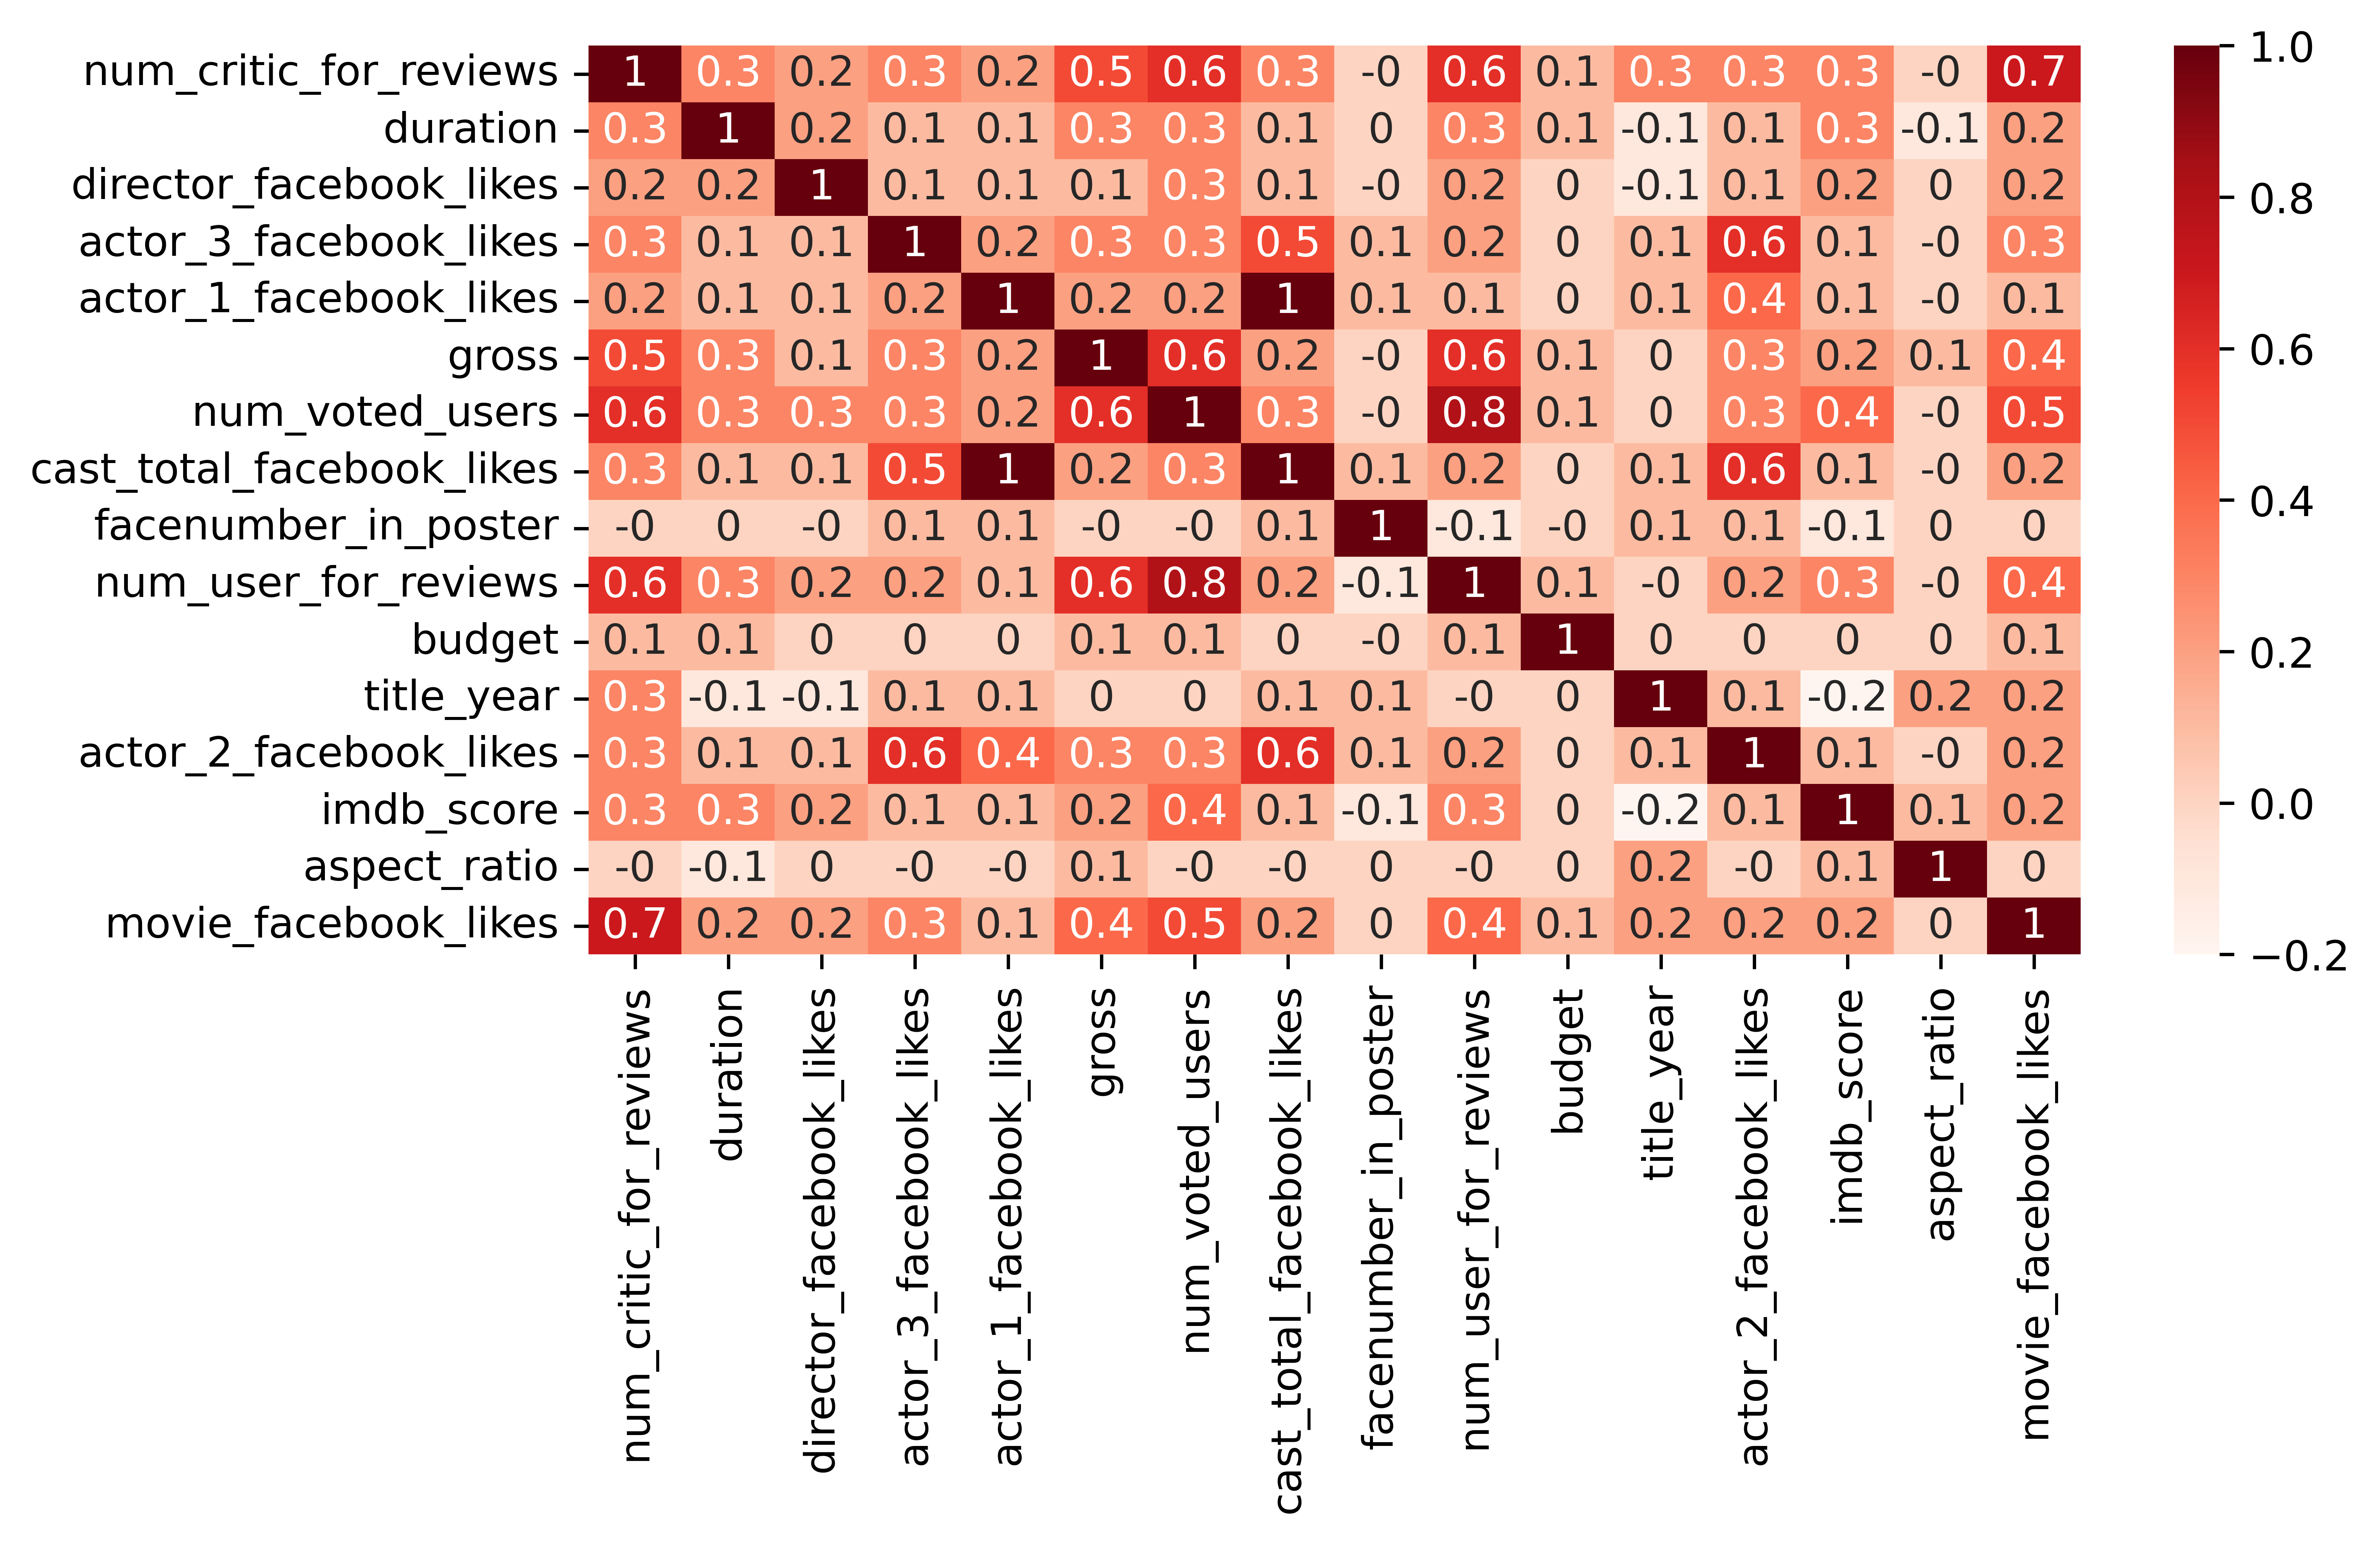

In [66]:
##相关性分析
plt.figure(dpi=800)
corr = df.corr()
sns.heatmap(df.corr().round(1), cmap='Reds', annot=True)
plt.show()

In [ ]:
##聚类前
cols = ['color', 'actor_2_name', 'genres', 'actor_1_name', 'actor_3_name', 'language', 'country', 'content_rating']
cols_num = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
                    'actor_1_facebook_likes', 'gross',  'cast_total_facebook_likes',
                    'facenumber_in_poster', 'num_user_for_reviews', 'budget',
                    'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
##独热码处理字符数据
ohmat = pd.get_dummies(df[cols])


In [67]:
##聚类前
cols = ['color', 'actor_2_name', 'genres', 'actor_1_name', 'actor_3_name', 'language', 'country', 'content_rating']
cols_num = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
                    'actor_1_facebook_likes', 'gross',  'cast_total_facebook_likes',
                    'facenumber_in_poster', 'num_user_for_reviews', 'budget',
                    'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
##独热码处理字符数据
ohmat = pd.get_dummies(df[cols])


      color_ Black and White  color_Color  actor_2_name_50 Cent  \
0                          0            1                     0   
1                          0            1                     0   
2                          0            1                     0   
3                          0            1                     0   
4                          0            0                     0   
...                      ...          ...                   ...   
5038                       0            1                     0   
5039                       0            1                     0   
5040                       0            1                     0   
5041                       0            1                     0   
5042                       0            1                     0   

      actor_2_name_A. Michael Baldwin  actor_2_name_A.J. Buckley  \
0                                   0                          0   
1                                   0                      